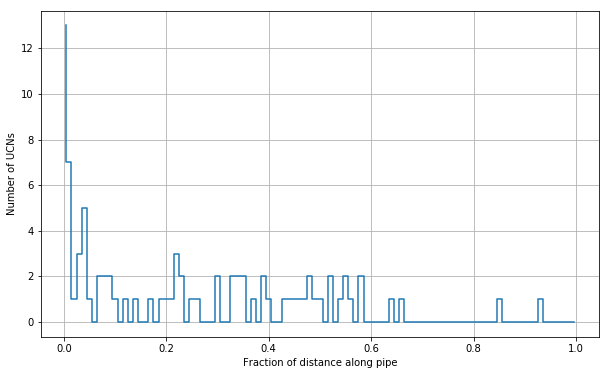

In [47]:
n_points = 101              # number of points to cut up curve into
max_distance = 50           # distance tolerance 
data = np.load("cloud.npy") # import data points to bin along curve

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the 3d curve
file_name = "curve.txt"
curve = np.loadtxt("curve.txt")
x_sample = curve[:,0]
y_sample = curve[:,1]
z_sample = curve[:,2]

# interpolate
from scipy import interpolate
tck, u = interpolate.splprep([x_sample, y_sample, z_sample])
u_eq = np.linspace(0,1,n_points)
x_interp, y_interp, z_interp = interpolate.splev(u_eq, tck)

# plt.rcParams["figure.figsize"] = 8,8
# plt.plot(z_sample, x_sample, '.')
# plt.plot(z_interp, x_interp, "r")
# plt.show()

# do some geometry
# point p0 in plane
p0 = np.zeros((n_points,3))
p0[:,0] = x_interp
p0[:,1] = y_interp
p0[:,2] = z_interp
# normal vector to plane (last point assumes same vector as penultimate point)
n = np.zeros((n_points,3))
n[0:n_points-1,:] = p0[1:n_points,:] - p0[0:n_points-1,:]
n[-1,:] = n[-2,:]
# plane: a*x + b*y + c*z = d
a = n[:,0]
b = n[:,1]
c = n[:,2]
d = a*x_interp + b*y_interp + c*z_interp


# make a histogram
n_bins = n_points - 1
hist = np.zeros(n_bins)
in_pipe_x = []
in_pipe_y = []
in_pipe_z = []
for point in data:
    for k in range(n_points-1):
        above_this_plane = ((a[k]*point[0] + b[k]*point[1] + c[k]*point[2]) > d[k])
        below_next_plane = ((a[k+1]*point[0] + b[k+1]*point[1] + c[k+1]*point[2]) < d[k+1])
        distance = np.sqrt((point[0]-x_interp[k])**2+(point[1]-y_interp[k])**2+(point[2]-z_interp[k])**2)
        within_distance = (distance < max_distance)
        if (above_this_plane and below_next_plane and within_distance):
            in_pipe_x.append(point[0])
            in_pipe_y.append(point[1])
            in_pipe_z.append(point[2])
            hist[k] += 1
            break

in_pipe = np.zeros((len(in_pipe_x),3))
in_pipe[:,0] = in_pipe_x
in_pipe[:,1] = in_pipe_y
in_pipe[:,2] = in_pipe_z

# plot the histogram
plt.rcParams["figure.figsize"] = 10,6
x_bin = (u_eq[1:] - u_eq[:-1])/2 + u_eq[:-1]
plt.step(x_bin, hist)
plt.xlabel("Fraction of distance along pipe")
plt.ylabel("Number of UCNs")
plt.grid()
plt.show()

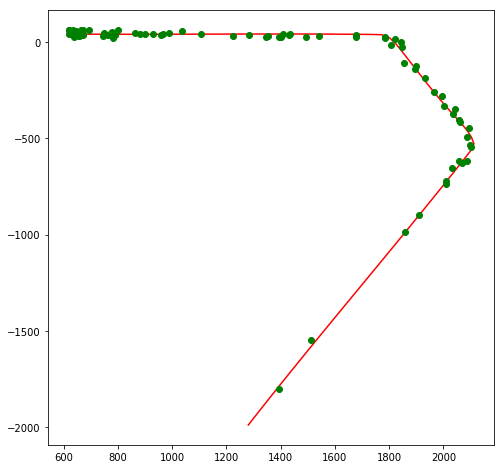

In [48]:
# check that things are making sense
plt.rcParams["figure.figsize"] = 8,8
# plt.plot(z_sample, x_sample, '.')
plt.plot(z_interp, x_interp, "r")
plt.plot(in_pipe[:,2], in_pipe[:,0], 'go')
plt.show()